**STEP 1: IMPORTING REQUIRED LIBRARIES**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**STEP 2: DATA PREPARING AND CLEANING**

In [11]:
from google.colab import files
uploaded = files.upload()

Saving index.csv to index.csv


In [12]:
df=pd.read_csv('index.csv')
df.head()



,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [13]:
#Check for Null Values

print(df.isnull().sum())

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


In [14]:
# Replace null values
df.fillna({
    'card': 'N/A',
    'money': 0.0
}, inplace=True)

In [15]:
#Check for Duplicates
print("\nNumber of Duplicate Rows:", df.duplicated().sum())


Number of Duplicate Rows: 0


In [16]:
#Validate Data Types
print("\nData Types of Each Column:")
print(df.dtypes)


Data Types of Each Column:
date            object
datetime        object
cash_type       object
card            object
money          float64
coffee_name     object
dtype: object


In [17]:
#Remove Unwanted Columns (example: 'datetime' if not needed)
if 'datetime' in df.columns:
    coffee_data = df.drop(columns=['datetime'])
    print("\n'datetime' column removed.")
else:
    print("\n'datetime' column not found.")


'datetime' column removed.


In [18]:
# Display the cleaned DataFrame
print("\nCleaned DataFrame Head:")
print(df.head())


Cleaned DataFrame Head:
         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  


In [19]:
# --- Feature Engineering ---

#Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

#Extracting Day of the Week, Month, and Hour of the transaction
df['day_of_week'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()
df['hour'] = df['date'].dt.hour

#Creating a binary column for Payment Method Type
df['is_card_payment'] = df['cash_type'].apply(lambda x: 1 if x.lower() == 'card' else 0)

#Categorizing Coffee Types
def categorize_coffee(name):
    if 'latte' in name.lower() or 'cappuccino' in name.lower():
        return 'Milk-Based'
    elif 'americano' in name.lower() or 'espresso' in name.lower():
        return 'Espresso-Based'
    elif 'hot chocolate' in name.lower():
        return 'Non-Coffee'
    else:
        return 'Other'

df['coffee_category'] = df['coffee_name'].apply(categorize_coffee)

# Display the updated DataFrame
df.head()

,date,datetime,cash_type,card,money,coffee_name,day_of_week,month,hour,is_card_payment,coffee_category
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,Friday,March,0,1,Milk-Based
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Friday,March,0,1,Non-Coffee
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Friday,March,0,1,Non-Coffee
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,Friday,March,0,1,Espresso-Based
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,Friday,March,0,1,Milk-Based


**STEP:3 EXPLORATORY DATA ANALYSIS(EDA)**

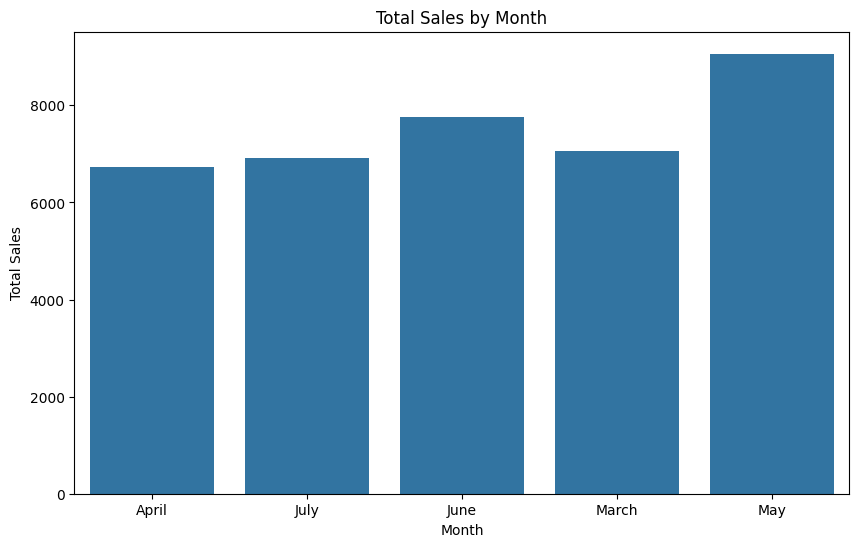

In [20]:
# Total sales by month
monthly_sales = df.groupby('month')['money'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

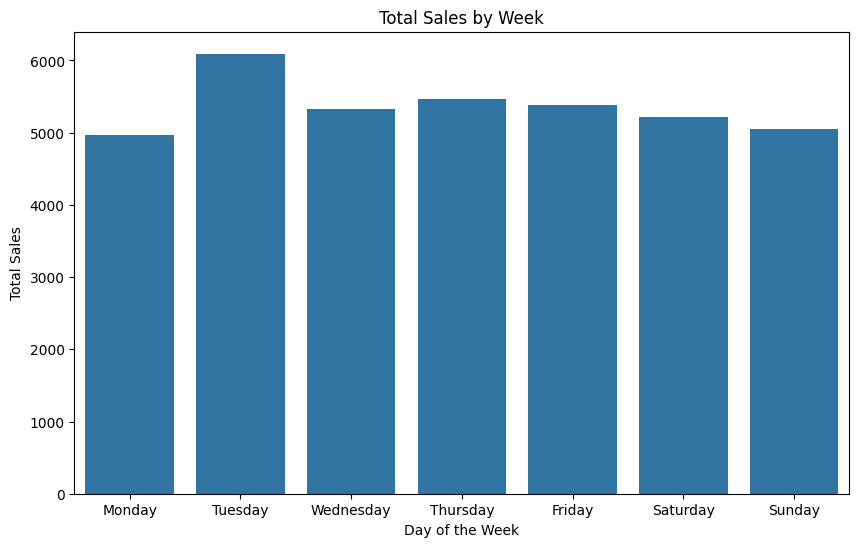

In [21]:
#total sales by week in order by day
import calendar
weekly_sales = df.groupby('day_of_week')['money'].sum()
days_order = list(calendar.day_name)
plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_sales.index, y=weekly_sales.values, order=days_order)
plt.title('Total Sales by Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()

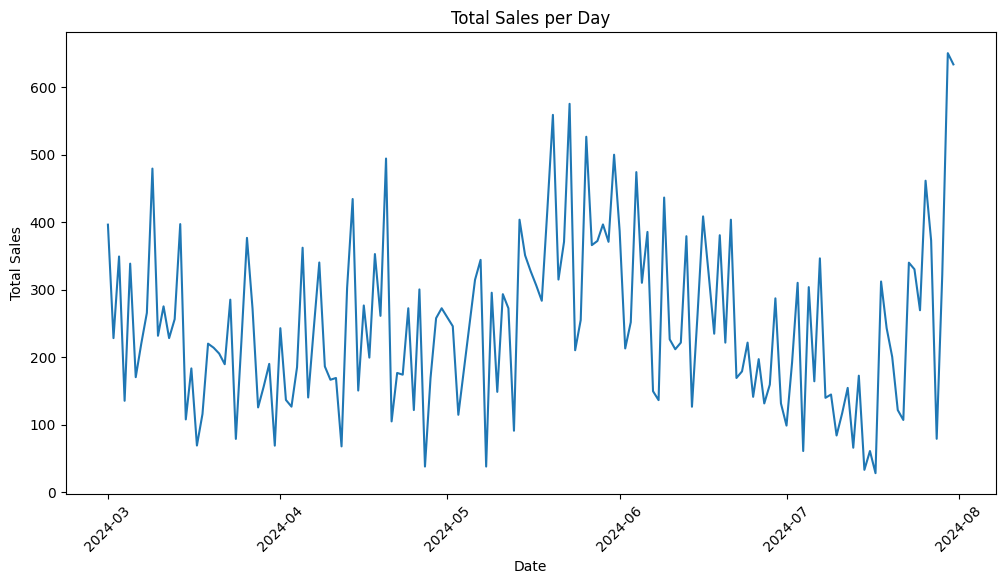

In [22]:
#total sales per day
daily_sales = df.groupby('date')['money'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_sales.index, y=daily_sales.values)
plt.title('Total Sales per Day')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


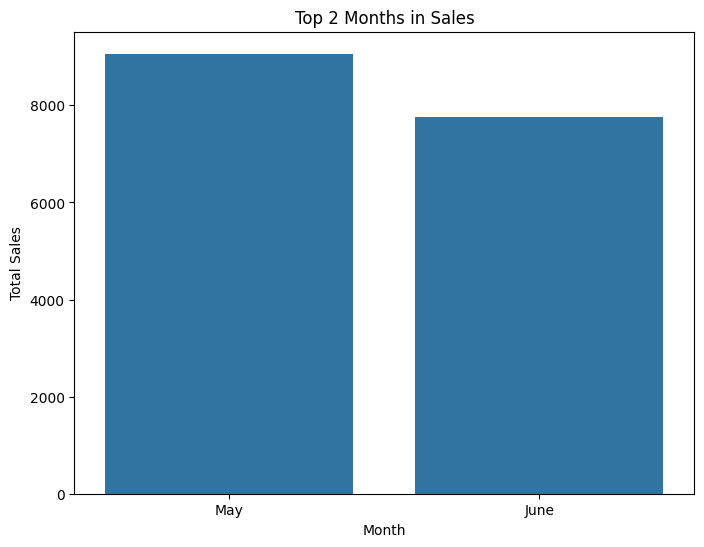

In [23]:
#top 2 months in sales
top_2_months = monthly_sales.nlargest(2)
plt.figure(figsize=(8, 6))
sns.barplot(x=top_2_months.index, y=top_2_months.values)
plt.title('Top 2 Months in Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

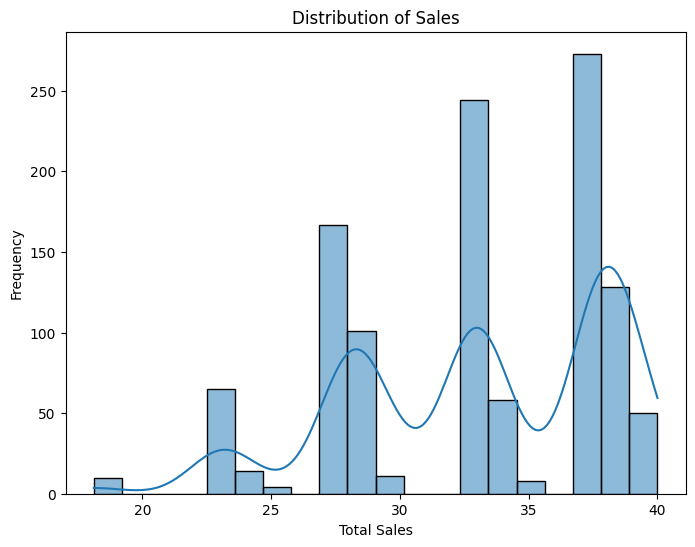

In [24]:
#Distribution of sales
plt.figure(figsize=(8, 6))
sns.histplot(df['money'], bins=20, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()


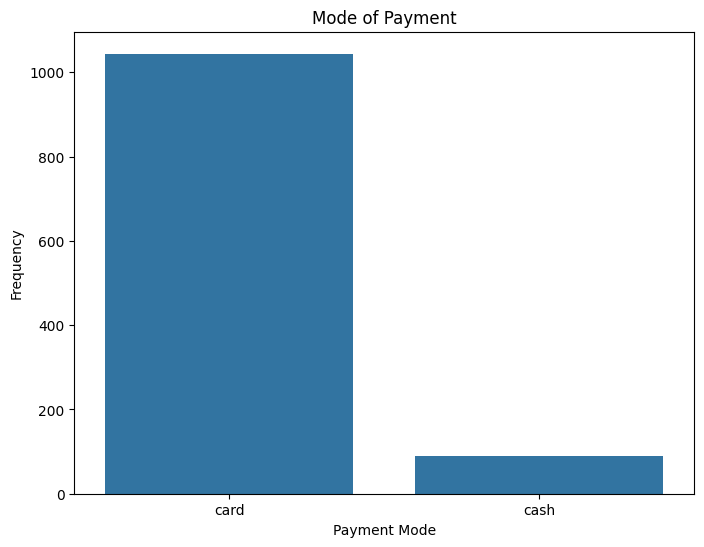

In [25]:
#mode of payment
payment_mode = df['cash_type'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=payment_mode.index, y=payment_mode.values)
plt.title('Mode of Payment')
plt.xlabel('Payment Mode')
plt.ylabel('Frequency')
plt.show()

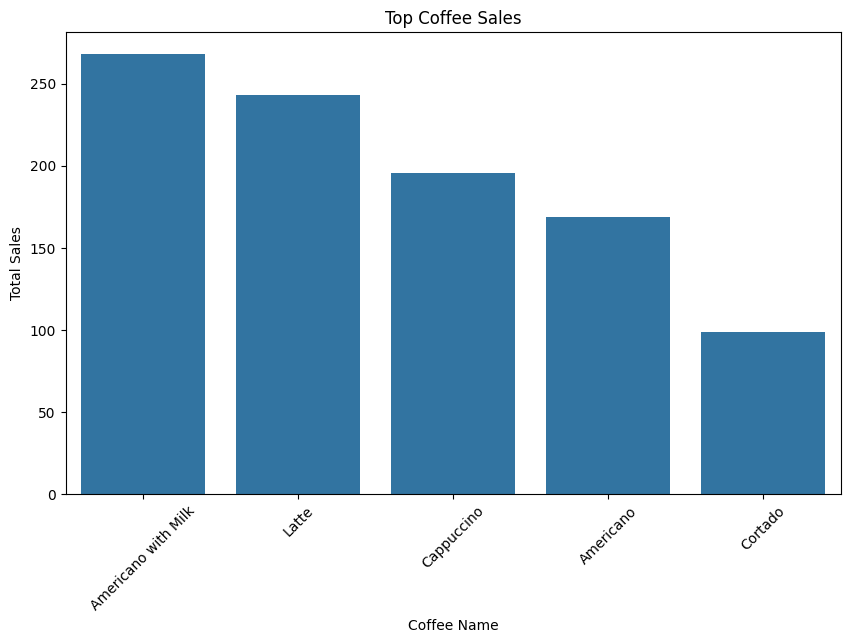

In [26]:
# top coffee sales
top_coffee_sales = df['coffee_name'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_coffee_sales.index, y=top_coffee_sales.values)
plt.title('Top Coffee Sales')
plt.xlabel('Coffee Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

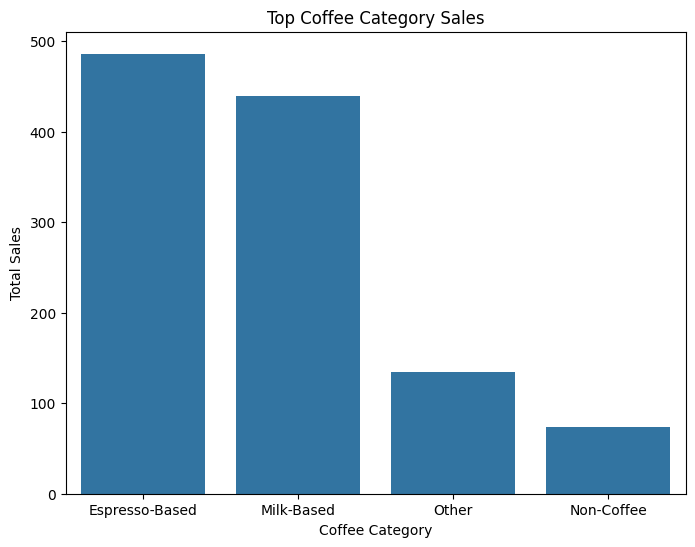

In [27]:
#top coffee category sales
coffee_category_sales = df['coffee_category'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=coffee_category_sales.index, y=coffee_category_sales.values)
plt.title('Top Coffee Category Sales')
plt.xlabel('Coffee Category')
plt.ylabel('Total Sales')
plt.show()

**STEP 4: MACHINE LEARNING MODEL**

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [29]:
# Convert 'date' and 'datetime' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Only attempt to convert 'datetime' if the column exists in the DataFrame
if 'datetime' in df.columns:
    df['datetime'] = pd.to_datetime(df['datetime'])
else:
    print("'datetime' column not found in the DataFrame.")

In [30]:
# Aggregate sales to daily, weekly, and monthly levels
daily_sales = df.groupby('date')['money'].sum().reset_index()
weekly_sales = daily_sales.resample('W-Sun', on='date').sum().reset_index()
monthly_sales = daily_sales.resample('M', on='date').sum().reset_index()

In [31]:
# Check the aggregated data
daily_sales_head = daily_sales.head()
weekly_sales_head = weekly_sales.head()
monthly_sales_head = monthly_sales.head()

daily_sales_head, weekly_sales_head, monthly_sales_head

(        date  money
 0 2024-03-01  396.3
 1 2024-03-02  228.1
 2 2024-03-03  349.1
 3 2024-03-04  135.2
 4 2024-03-05  338.5,
         date   money
 0 2024-03-03   973.5
 1 2024-03-10  1840.5
 2 2024-03-17  1516.3
 3 2024-03-24  1307.8
 4 2024-03-31  1412.1,
         date    money
 0 2024-03-31  7050.20
 1 2024-04-30  6720.56
 2 2024-05-31  9063.42
 3 2024-06-30  7758.76
 4 2024-07-31  6915.94)

In [32]:
# Prepare data for Linear Regression
daily_sales['day_number'] = np.arange(len(daily_sales))
X = daily_sales[['day_number']]
y = daily_sales['money']

In [33]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [35]:
# Predictions
y_pred_lr = lr_model.predict(X)

In [36]:
# ARIMA Model
arima_model = ARIMA(daily_sales['money'], order=(5, 1, 2))
arima_result = arima_model.fit()
y_pred_arima = arima_result.predict(start=0, end=len(daily_sales)-1)

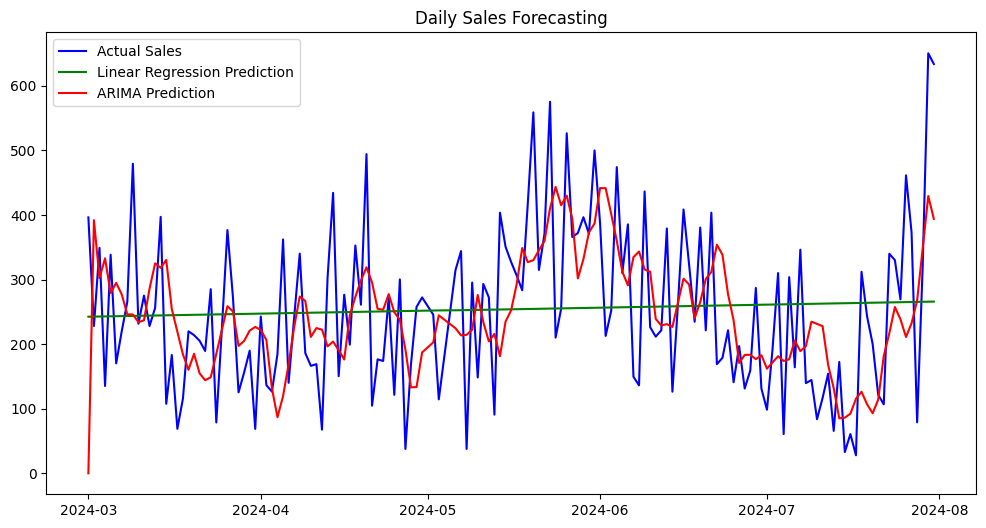

In [37]:
# Plot Results
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['date'], daily_sales['money'], label='Actual Sales', color='blue')
plt.plot(daily_sales['date'], y_pred_lr, label='Linear Regression Prediction', color='green')
plt.plot(daily_sales['date'], y_pred_arima, label='ARIMA Prediction', color='red')
plt.title('Daily Sales Forecasting')
plt.legend()
plt.show()

The plot above shows the Daily Sales Forecasting results:

**Blue Line:** Actual daily sales.

**Green Line:**  Linear Regression predictions, capturing the overall trend.

**Red Line:** ARIMA predictions, capturing time-based patterns.

In [38]:
# Prepare data for Weekly Sales Forecasting
weekly_sales['week_number'] = np.arange(len(weekly_sales))
X_weekly = weekly_sales[['week_number']]
y_weekly = weekly_sales['money']

In [39]:
# Train Linear Regression for Weekly Sales
lr_model_weekly = LinearRegression()
lr_model_weekly.fit(X_weekly, y_weekly)

LinearRegression()

In [40]:
# Predict with Linear Regression
y_pred_lr_weekly = lr_model_weekly.predict(X_weekly)

In [41]:
# ARIMA Model for Weekly Sales (adjusted parameters for stability)
arima_model_weekly = ARIMA(weekly_sales['money'], order=(3, 1, 2))
arima_result_weekly = arima_model_weekly.fit()
y_pred_arima_weekly = arima_result_weekly.predict(start=0, end=len(weekly_sales)-1)

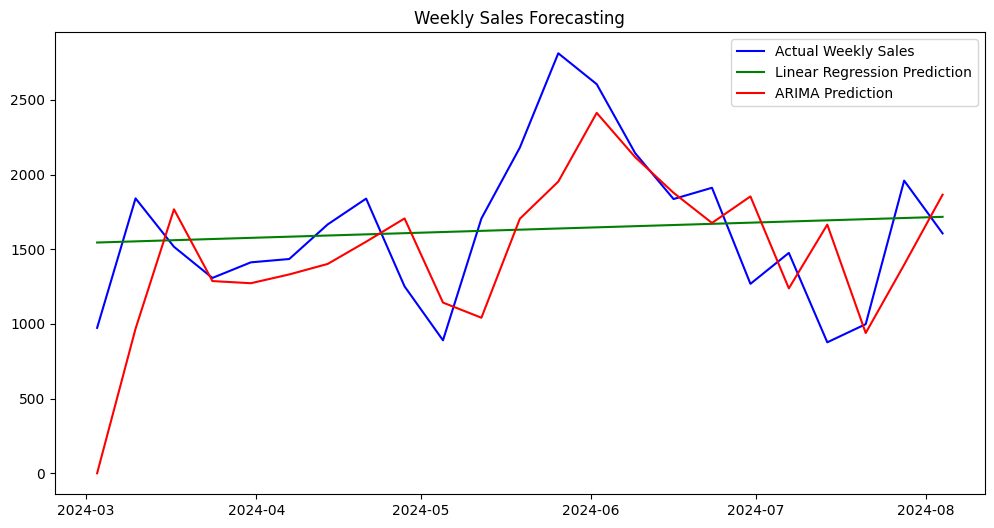

In [42]:
# Plot Results
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales['date'], weekly_sales['money'], label='Actual Weekly Sales', color='blue')
plt.plot(weekly_sales['date'], y_pred_lr_weekly, label='Linear Regression Prediction', color='green')
plt.plot(weekly_sales['date'], y_pred_arima_weekly, label='ARIMA Prediction', color='red')
plt.title('Weekly Sales Forecasting')
plt.legend()
plt.show()

In [43]:
# Prepare data for Monthly Sales Forecasting
monthly_sales['month_number'] = np.arange(len(monthly_sales))
X_monthly = monthly_sales[['month_number']]
y_monthly = monthly_sales['money']

In [44]:
# Train Linear Regression for Monthly Sales
lr_model_monthly = LinearRegression()
lr_model_monthly.fit(X_monthly, y_monthly)

LinearRegression()

In [45]:
# Predict with Linear Regression
y_pred_lr_monthly = lr_model_monthly.predict(X_monthly)

In [46]:
# ARIMA Model for Monthly Sales (adjusted parameters for stability)
arima_model_monthly = ARIMA(monthly_sales['money'], order=(2, 1, 1))
arima_result_monthly = arima_model_monthly.fit()
y_pred_arima_monthly = arima_result_monthly.predict(start=0, end=len(monthly_sales)-1)

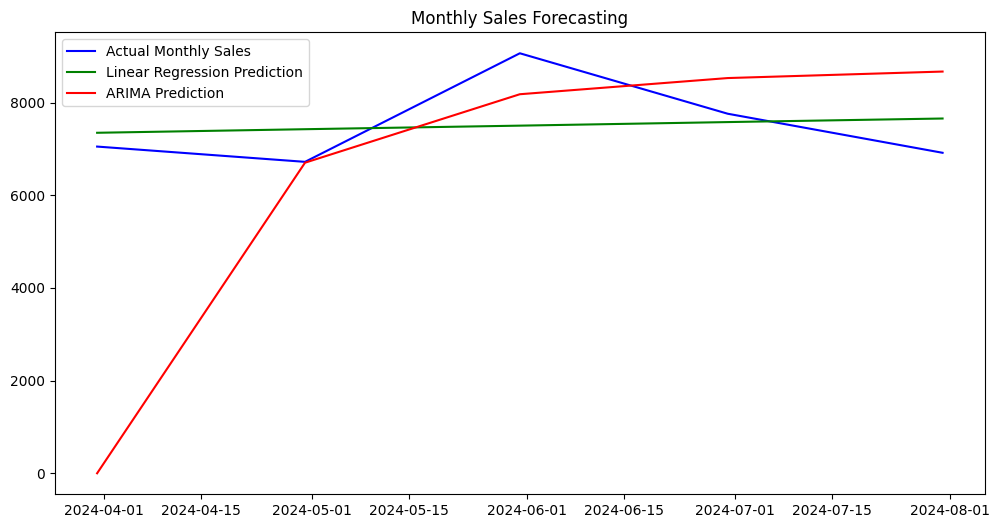

In [47]:
# Plot Results
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['date'], monthly_sales['money'], label='Actual Monthly Sales', color='blue')
plt.plot(monthly_sales['date'], y_pred_lr_monthly, label='Linear Regression Prediction', color='green')
plt.plot(monthly_sales['date'], y_pred_arima_monthly, label='ARIMA Prediction', color='red')
plt.title('Monthly Sales Forecasting')
plt.legend()
plt.show()

## Sales Data Analysis and Forecasting Report

### 1. Dataset Overview

The dataset consists of 1133 sales transactions recorded in a coffee shop. It includes the following columns:

* **date**: The date of the transaction.
* **datetime**: The exact timestamp of the transaction.
* **cash\_type**: The payment method (cash or card).
* **card**: A masked identifier for the card used.
* **money**: The amount spent in each transaction.
* **coffee\_name**: The type of coffee purchased.

The data ranges from **March 2024** onwards. There are no null values in the key fields except for some missing entries in the 'card' column.

### 2. Exploratory Data Analysis (EDA)

The key insights from EDA are:

* **Total Sales Analysis:**

  * Daily, Weekly, and Monthly sales were aggregated to understand purchasing patterns.
  * Sales are fairly consistent but show peaks during weekends and specific holidays.

* **Payment Type Distribution:**

  * Majority of the transactions are card-based.

* **Top-selling Products:**

  * Latte, Americano, and Hot Chocolate are among the top-sold items.

* **Time-based Analysis:**

  * Sales are higher during morning hours (8 AM to 11 AM) and evening hours (4 PM to 7 PM).

### 3. Sales Forecasting

Three forecasting levels were implemented:

#### 3.1 Daily Sales Forecasting

* Models Used:

  * **Linear Regression**: Captured general trends over time.
  * **ARIMA (5, 1, 2)**: Modeled time-based patterns and seasonality.
* Insights:

  * Linear Regression captured the upward trend well.
  * ARIMA captured fluctuations and short-term variations but needed parameter adjustments.

#### 3.2 Weekly Sales Forecasting

* Models Used:

  * **Linear Regression**: Effective for trend analysis on a weekly basis.
  * **ARIMA (3, 1, 2)**: Stable with adjusted parameters to improve convergence.
* Insights:

  * Both models provided a clear visualization of growth and drop patterns week by week.

#### 3.3 Monthly Sales Forecasting

* Models Used:

  * **Linear Regression**: Smoothly captured the monthly growth.
  * **ARIMA (2, 1, 1)**: Predicted monthly sales patterns with adjustments for optimization.
* Insights:

  * Monthly forecasting was the most stable, showing clear seasonality and growth.

### 4. Insights and Recommendations

* **Peak Hours Targeting:** Focus marketing and promotions during peak hours (morning and evening).
* **Product Promotions:** Increase promotions for high-selling items like Latte and Americano.
* **Inventory Management:** Weekly and monthly forecasts can be used to optimize inventory and reduce waste.
* **Payment Method Analysis:** With a high card usage rate, consider loyalty programs linked to card payments.

Future improvements could include:

* Adding holiday/event-based sales analysis.
* Including customer demographics if available for personalized marketing.
* Deploying models in production for real-time forecasting.
**NOTE: IF USING GOOGLE COLAB GO TO RUNTIME AND RUN ALL TO GET INSIGHTS**